In [71]:
############################################################
### Analyses of Digimeter Data || Frederik De Spiegeleer ###
############################################################

# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import skew, kurtosis, shapiro, spearmanr, ttest_rel, wilcoxon
import math 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
# Input dataset
Data = pd.read_csv('/Users/frederikdespiegeleer/Documents/Ph.D. voorstellen/Lieven De Marez/Opdracht/FW__kwantitatieve_profiel_voor_SOLIDLab_/sampleData.csv')
## Check data
Data

,Q5,Q6,Q7,Q8,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,...,Q76_12,Q76_13,Q97_1,Q97_2,Q97_3,Q97_4,Q97_5,Q97_6,Q102,control
0,2,1965,4,4,2,1,3,2,1,1,...,3.0,3.0,4,3,4,3,4,1,NaN,4.166667
1,1,1985,5,2,1,2,2,2,1,1,...,5.0,5.0,5,2,3,1,4,1,1.0,3.333333
2,2,1971,4,2,1,1,2,1,1,1,...,4.0,4.0,4,3,4,4,4,3,2.0,3.000000
3,2,1957,4,4,2,2,1,1,1,1,...,3.0,3.0,5,3,3,2,4,4,NaN,3.833333
4,2,1972,5,2,2,1,1,1,1,1,...,3.0,3.0,4,2,2,2,4,2,2.0,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2,1970,4,2,2,1,1,2,2,1,...,2.0,4.0,4,4,3,3,4,3,2.0,3.333333
696,1,1997,6,1,1,1,2,1,1,1,...,3.0,3.0,4,1,2,2,4,2,NaN,4.166667
697,2,1951,5,5,1,1,1,1,1,1,...,4.0,4.0,4,3,3,3,4,4,NaN,4.000000
698,1,1996,4,1,1,1,3,1,1,1,...,4.0,4.0,5,2,4,3,4,3,NaN,3.666667


In [3]:
# Exclude participants with missing values/NA (except for variable Q102)
Data = Data.dropna(thresh=31)
## Check data
Data

,Q5,Q6,Q7,Q8,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,...,Q76_12,Q76_13,Q97_1,Q97_2,Q97_3,Q97_4,Q97_5,Q97_6,Q102,control
0,2,1965,4,4,2,1,3,2,1,1,...,3.0,3.0,4,3,4,3,4,1,NaN,4.166667
1,1,1985,5,2,1,2,2,2,1,1,...,5.0,5.0,5,2,3,1,4,1,1.0,3.333333
2,2,1971,4,2,1,1,2,1,1,1,...,4.0,4.0,4,3,4,4,4,3,2.0,3.000000
3,2,1957,4,4,2,2,1,1,1,1,...,3.0,3.0,5,3,3,2,4,4,NaN,3.833333
4,2,1972,5,2,2,1,1,1,1,1,...,3.0,3.0,4,2,2,2,4,2,2.0,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2,1970,4,2,2,1,1,2,2,1,...,2.0,4.0,4,4,3,3,4,3,2.0,3.333333
696,1,1997,6,1,1,1,2,1,1,1,...,3.0,3.0,4,1,2,2,4,2,NaN,4.166667
697,2,1951,5,5,1,1,1,1,1,1,...,4.0,4.0,4,3,3,3,4,4,NaN,4.000000
698,1,1996,4,1,1,1,3,1,1,1,...,4.0,4.0,5,2,4,3,4,3,NaN,3.666667


In [4]:
# Demographics
## Counts Sex
print('Counts Sex:')
print(Data['Q5'].value_counts())
## Year of birth
print('Year of birth:')
print('Mean:', Data['Q6'].mean())
print('Min:', Data['Q6'].min())
print('Max:', Data['Q6'].max())
## Highest degree
print('Highest degree:')
print(Data['Q7'].value_counts()/698)
## Current professional situation
print('Current professional situation:')
print(Data['Q8'].value_counts()/698)

Counts Sex:
1    358
2    340
Name: Q5, dtype: int64
Year of birth:
Mean: 1971.6060171919771
Min: 1935
Max: 2004
Highest degree:
4    0.378223
5    0.220630
6    0.186246
3    0.161891
2    0.032951
1    0.020057
Name: Q7, dtype: float64
Current professional situation:
2    0.405444
5    0.286533
1    0.111748
3    0.108883
4    0.087393
Name: Q8, dtype: float64


Percentage van mensen die ziekenhuizen (zeker) vertrouwt:
70.77


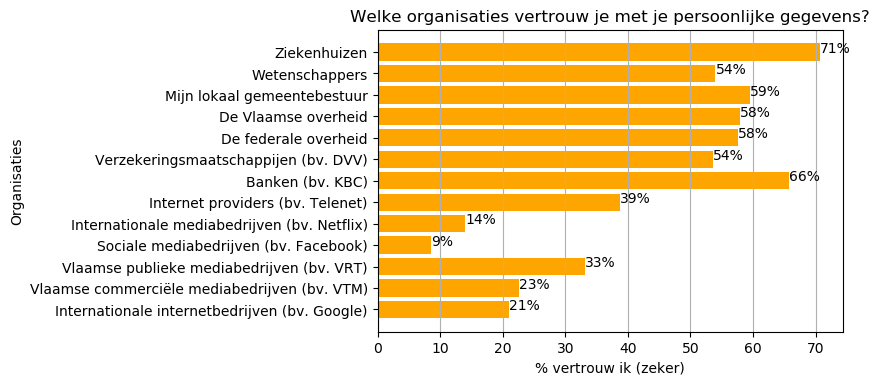

In [5]:
# Trust in organisations
## Create variable sets
trust_1_4 = (Data['Q76_1'].values == 4).sum()
trust_1_5 = (Data['Q76_1'].values == 5).sum()
trust_1  = (trust_1_4+trust_1_5)/6.98
trust_2_4 = (Data['Q76_2'].values == 4).sum()
trust_2_5 = (Data['Q76_2'].values == 5).sum()
trust_2  = (trust_2_4+trust_2_5)/6.98
trust_3_4 = (Data['Q76_3'].values == 4).sum()
trust_3_5 = (Data['Q76_3'].values == 5).sum()
trust_3  = (trust_3_4+trust_3_5)/6.98
trust_4_4 = (Data['Q76_4'].values == 4).sum()
trust_4_5 = (Data['Q76_4'].values == 5).sum()
trust_4  = (trust_4_4+trust_4_5)/6.98
trust_5_4 = (Data['Q76_5'].values == 4).sum()
trust_5_5 = (Data['Q76_5'].values == 5).sum()
trust_5  = (trust_5_4+trust_5_5)/6.98
trust_6_4 = (Data['Q76_6'].values == 4).sum()
trust_6_5 = (Data['Q76_6'].values == 5).sum()
trust_6  = (trust_6_4+trust_6_5)/6.98
trust_7_4 = (Data['Q76_7'].values == 4).sum()
trust_7_5 = (Data['Q76_7'].values == 5).sum()
trust_7  = (trust_7_4+trust_7_5)/6.98
trust_8_4 = (Data['Q76_8'].values == 4).sum()
trust_8_5 = (Data['Q76_8'].values == 5).sum()
trust_8  = (trust_8_4+trust_8_5)/6.98
trust_9_4 = (Data['Q76_9'].values == 4).sum()
trust_9_5 = (Data['Q76_9'].values == 5).sum()
trust_9  = (trust_9_4+trust_9_5)/6.98
trust_10_4 = (Data['Q76_10'].values == 4).sum()
trust_10_5 = (Data['Q76_10'].values == 5).sum()
trust_10  = (trust_10_4+trust_10_5)/6.98
trust_11_4 = (Data['Q76_11'].values == 4).sum()
trust_11_5 = (Data['Q76_11'].values == 5).sum()
trust_11  = (trust_11_4+trust_11_5)/6.98
trust_12_4 = (Data['Q76_12'].values == 4).sum()
trust_12_5 = (Data['Q76_12'].values == 5).sum()
trust_12  = (trust_12_4+trust_12_5)/6.98
trust_13_4 = (Data['Q76_13'].values == 4).sum()
trust_13_5 = (Data['Q76_13'].values == 5).sum()
trust_13  = (trust_13_4+trust_13_5)/6.98
trust_var = ['Internationale internetbedrijven (bv. Google)', 'Vlaamse commerciële mediabedrijven (bv. VTM)', 
             'Vlaamse publieke mediabedrijven (bv. VRT)', 'Sociale mediabedrijven (bv. Facebook)', 
             'Internationale mediabedrijven (bv. Netflix)', 'Internet providers (bv. Telenet)', 
             'Banken (bv. KBC)', 'Verzekeringsmaatschappijen (bv. DVV)', 'De federale overheid', 
             'De Vlaamse overheid', 'Mijn lokaal gemeentebestuur', 'Wetenschappers', 'Ziekenhuizen']
trust_val = [trust_1, trust_2, trust_3, trust_4, trust_5, trust_6, trust_7, trust_8, trust_9, trust_10, 
             trust_11, trust_12, trust_13]

## Create plot
fig, ax = plt.subplots(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
ax.barh(trust_var, trust_val, align='center', color = 'orange')

ax.set_ylabel('Organisaties')
ax.set_xlabel('% vertrouw ik (zeker)')
ax.set_title('Welke organisaties vertrouw je met je persoonlijke gegevens?')
ax.xaxis.grid(True)
for index, value in enumerate(trust_val):
    plt.text(value, index, "{:.0f}%".format(value))

## How many people trust hospitals
print('Percentage van mensen die ziekenhuizen (zeker) vertrouwt:')
print("{:.2f}".format(trust_13))

In [6]:
# Difference between trust in international internet companies (e.g., Google) vs social media companies (e.g., Facebook)
## Wilcoxon signed-rank test
stat, p = wilcoxon(Data['Q76_1'], Data['Q76_4'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

## interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
print('Median international internet companies (e.g., Google): {}'.format(statistics.median(Data['Q76_1'])))
print('Median social media companies (e.g., Facebook): {}'.format(statistics.median(Data['Q76_4'])))

Statistics=3906.000, p=0.000
Different distribution (reject H0)
Median international internet companies (e.g., Google): 3.0
Median social media companies (e.g., Facebook): 2.0


In [7]:
# Control question; check if they answered with "Akkoord":
print('Check if they answered with "Akkoord":')
print(Data['Q97_5'].value_counts())

Check if they answered with "Akkoord":
4    659
3     20
2      9
1      7
5      3
Name: Q97_5, dtype: int64


In [8]:
# Exclude participants with missing values/NA in variable control
Data = Data.dropna(subset = ['control'])
## Check data
Data

,Q5,Q6,Q7,Q8,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,...,Q76_12,Q76_13,Q97_1,Q97_2,Q97_3,Q97_4,Q97_5,Q97_6,Q102,control
0,2,1965,4,4,2,1,3,2,1,1,...,3.0,3.0,4,3,4,3,4,1,NaN,4.166667
1,1,1985,5,2,1,2,2,2,1,1,...,5.0,5.0,5,2,3,1,4,1,1.0,3.333333
2,2,1971,4,2,1,1,2,1,1,1,...,4.0,4.0,4,3,4,4,4,3,2.0,3.000000
3,2,1957,4,4,2,2,1,1,1,1,...,3.0,3.0,5,3,3,2,4,4,NaN,3.833333
4,2,1972,5,2,2,1,1,1,1,1,...,3.0,3.0,4,2,2,2,4,2,2.0,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2,1970,4,2,2,1,1,2,2,1,...,2.0,4.0,4,4,3,3,4,3,2.0,3.333333
696,1,1997,6,1,1,1,2,1,1,1,...,3.0,3.0,4,1,2,2,4,2,NaN,4.166667
697,2,1951,5,5,1,1,1,1,1,1,...,4.0,4.0,4,3,3,3,4,4,NaN,4.000000
698,1,1996,4,1,1,1,3,1,1,1,...,4.0,4.0,5,2,4,3,4,3,NaN,3.666667


In [85]:
# Check correlations
## Spearman correlation for all variables
Data_trust = Data[['Q76_1', 'Q76_2', 'Q76_3', 'Q76_4', 'Q76_5', 'Q76_6', 'Q76_7', 'Q76_8', 
         'Q76_9', 'Q76_10', 'Q76_11', 'Q76_12', 'Q76_13']]
Data_trust.corr(method="spearman")

,Q76_1,Q76_2,Q76_3,Q76_4,Q76_5,Q76_6,Q76_7,Q76_8,Q76_9,Q76_10,Q76_11,Q76_12,Q76_13
Q76_1,1.000000,0.602526,0.479184,0.627898,0.612432,0.522697,0.310707,0.350139,0.310338,0.297044,0.286022,0.143668,0.163233
Q76_2,0.602526,1.000000,0.733751,0.565244,0.580306,0.538199,0.303865,0.314389,0.320287,0.319774,0.353659,0.198136,0.244040
Q76_3,0.479184,0.733751,1.000000,0.359509,0.430897,0.475535,0.360012,0.330572,0.409491,0.404580,0.420945,0.335302,0.314041
Q76_4,0.627898,0.565244,0.359509,1.000000,0.653260,0.428388,0.247635,0.266084,0.205740,0.202089,0.221036,0.063563,0.133860
Q76_5,0.612432,0.580306,0.430897,0.653260,1.000000,0.456590,0.281263,0.269203,0.217081,0.208367,0.239266,0.150765,0.194419
Q76_6,0.522697,0.538199,0.475535,0.428388,0.456590,1.000000,0.542632,0.496990,0.443983,0.464307,0.431492,0.242484,0.348562
Q76_7,0.310707,0.303865,0.360012,0.247635,0.281263,0.542632,1.000000,0.733509,0.575305,0.579760,0.525133,0.276462,0.472479
Q76_8,0.350139,0.314389,0.330572,0.266084,0.269203,0.496990,0.733509,1.000000,0.525043,0.520683,0.485476,0.235637,0.375292
Q76_9,0.310338,0.320287,0.409491,0.205740,0.217081,0.443983,0.575305,0.525043,1.000000,0.936329,0.731032,0.412410,0.505219
Q76_10,0.297044,0.319774,0.404580,0.202089,0.208367,0.464307,0.579760,0.520683,0.936329,1.000000,0.713857,0.385316,0.500048


In [12]:
# Variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF_Value"] = [variance_inflation_factor(dataset.values, i) for i in range (dataset.shape[1])]
    return(vif)
features = Data.iloc[:,11:24]
calculate_vif(features)

,features,VIF_Value
0,Q76_1,19.726134
1,Q76_2,36.086523
2,Q76_3,34.725174
3,Q76_4,16.257700
4,Q76_5,18.951511
5,Q76_6,29.874848
6,Q76_7,55.021010
7,Q76_8,42.300654
8,Q76_9,123.480425
9,Q76_10,116.118144


In [13]:
# Principal Component analysis (PCA) for trust-in-organisations variables
features = ['Q76_1', 'Q76_2', 'Q76_3', 'Q76_4', 'Q76_5', 'Q76_6', 'Q76_7', 'Q76_8', 
            'Q76_9', 'Q76_10', 'Q76_11', 'Q76_12', 'Q76_13']
z = Data.loc[:, features].values
## Standardize data before PCA 
z = StandardScaler().fit_transform(z)
pd.DataFrame(data = z, columns = features).head()

,Q76_1,Q76_2,Q76_3,Q76_4,Q76_5,Q76_6,Q76_7,Q76_8,Q76_9,Q76_10,Q76_11,Q76_12,Q76_13
0,1.357899,1.324515,1.064764,0.749398,-0.606660,0.965013,-0.700296,-0.476584,-0.506853,-0.513449,0.564900,-0.581054,-0.914122
1,1.357899,2.447613,2.196076,1.835323,1.567334,0.965013,0.442810,-0.476584,1.660488,1.642417,1.702862,1.650320,1.481152
2,0.330260,0.201417,-0.066548,0.749398,0.480337,-0.159760,0.442810,0.653276,0.576818,0.564484,0.564900,0.534633,0.283515
3,-1.725018,0.201417,-0.066548,-1.422453,0.480337,-0.159760,-0.700296,-0.476584,-1.590524,-1.591381,-1.711026,-0.581054,-0.914122
4,0.330260,1.324515,1.064764,0.749398,0.480337,0.965013,0.442810,0.653276,0.576818,0.564484,0.564900,-0.581054,-0.914122


In [68]:
# PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(z)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA factor'])
principalDf.head(5)

,PCA factor
0,-0.514704
1,-5.046185
2,-1.396298
3,2.884783
4,-1.844101


In [69]:
# Explained variance of principal component
print('Explained variance of principal component:')
pca.explained_variance_ratio_

Explained variance of principal component:


array([0.48512237])

In [16]:
# Add pca factor of trust in organisations as variable to the dataframe
Data.reset_index(drop=True, inplace=True) # Resetting index to make dataset allign with other dataframes
Data['PCA factor'] = principalDf
Data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Q5,Q6,Q7,Q8,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,...,Q76_13,Q97_1,Q97_2,Q97_3,Q97_4,Q97_5,Q97_6,Q102,control,PCA factor
0,2,1965,4,4,2,1,3,2,1,1,...,3.0,4,3,4,3,4,1,NaN,4.166667,-0.514704
1,1,1985,5,2,1,2,2,2,1,1,...,5.0,5,2,3,1,4,1,1.0,3.333333,-5.046185
2,2,1971,4,2,1,1,2,1,1,1,...,4.0,4,3,4,4,4,3,2.0,3.000000,-1.396298
3,2,1957,4,4,2,2,1,1,1,1,...,3.0,5,3,3,2,4,4,NaN,3.833333,2.884783
4,2,1972,5,2,2,1,1,1,1,1,...,3.0,4,2,2,2,4,2,2.0,3.333333,-1.844101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,2,1970,4,2,2,1,1,2,2,1,...,4.0,4,4,3,3,4,3,2.0,3.333333,4.199899
693,1,1997,6,1,1,1,2,1,1,1,...,3.0,4,1,2,2,4,2,NaN,4.166667,5.714161
694,2,1951,5,5,1,1,1,1,1,1,...,4.0,4,3,3,3,4,4,NaN,4.000000,-1.736403
695,1,1996,4,1,1,1,3,1,1,1,...,4.0,5,2,4,3,4,3,NaN,3.666667,0.283209


Text(0.5, 1.0, 'Distributie van variabele control')

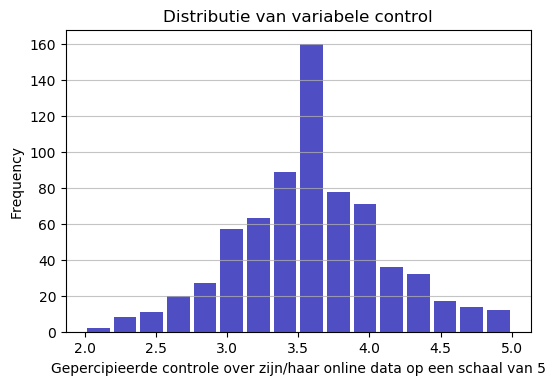

In [22]:
# Histograms of variable control
fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n, bins, patches = plt.hist(x=Data['control'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Gepercipieerde controle over zijn/haar online data op een schaal van 5')
plt.ylabel('Frequency')
plt.title('Distributie van variabele control')

Text(0.5, 1.0, 'Distributie van PCA factor')

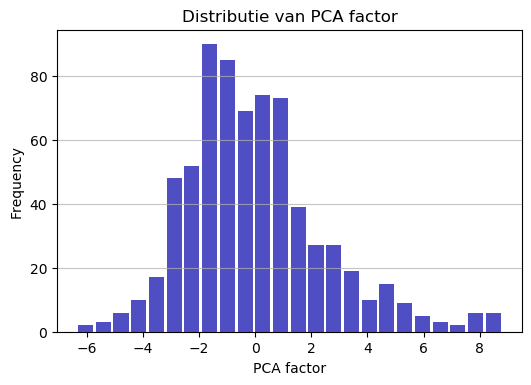

In [23]:
# Histograms of PCA factor
fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n, bins, patches = plt.hist(x=Data['PCA factor'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('PCA factor')
plt.ylabel('Frequency')
plt.title('Distributie van PCA factor')

Text(0.5, 1.0, 'Distributie van geboortejaar')

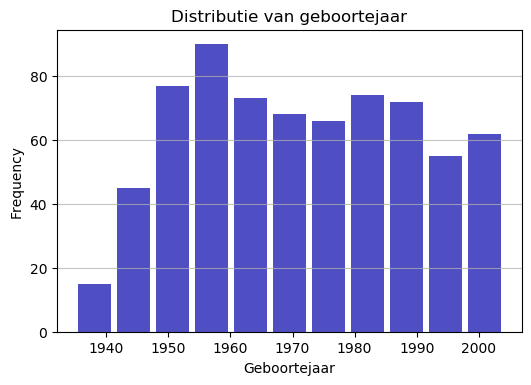

In [25]:
# Histograms of variable year of birth
fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n, bins, patches = plt.hist(x=Data['Q6'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Geboortejaar')
plt.ylabel('Frequency')
plt.title('Distributie van geboortejaar')

In [26]:
# Shapiro, skewness and kurtosis of variable control and PCA factor
print('Variable control:')
print('- Normal distribution: Statistic and p-value (should be > 0.05): {}'.format(shapiro(Data['control'])))
print('- Skewness of normal distribution (should be 0): {}'.format(skew(Data['control'])))
print('- Excess kurtosis of normal distribution (should be 0): {}'.format(kurtosis(Data['control'])))
print()
print('PCA factor:')
print('- Normal distribution: Statistic and p-value (should be > 0.05): {}'.format(shapiro(Data['PCA factor'])))
print('- Skewness of normal distribution (should be 0): {}'.format(skew(Data['PCA factor'])))
print('- Excess kurtosis of normal distribution (should be 0): {}'.format(kurtosis(Data['PCA factor'])))
print()
print('Geboortejaar:')
print('- Normal distribution: Statistic and p-value (should be > 0.05): {}'.format(shapiro(Data['Q6'])))
print('- Skewness of normal distribution (should be 0): {}'.format(skew(Data['Q6'])))
print('- Excess kurtosis of normal distribution (should be 0): {}'.format(kurtosis(Data['Q6'])))

Variable control:
- Normal distribution: Statistic and p-value (should be > 0.05): (0.9891358017921448, 4.9328646127833053e-05)
- Skewness of normal distribution (should be 0): 0.10216106728428294
- Excess kurtosis of normal distribution (should be 0): -0.037298914721865195

PCA factor:
- Normal distribution: Statistic and p-value (should be > 0.05): (0.9536486268043518, 5.3216616904177075e-14)
- Skewness of normal distribution (should be 0): 0.888709145244472
- Excess kurtosis of normal distribution (should be 0): 1.3007624863996305

Geboortejaar:
- Normal distribution: Statistic and p-value (should be > 0.05): (0.9648915529251099, 7.140888141216051e-12)
- Skewness of normal distribution (should be 0): 0.08570356960969594
- Excess kurtosis of normal distribution (should be 0): -1.0986667258121454


[Text(0, 0.5, 'Vertrouwen in organisaties (PCA factor)'),
 Text(0.5, 0, 'Gepercipieerde controle over zijn/haar online data op een schaal van 5')]

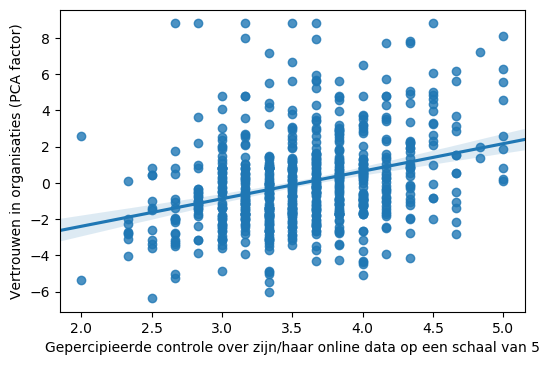

In [86]:
# Scatterplot between PCA factor and variable control
fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.regplot(x=Data['control'], y=Data['PCA factor'], marker ='o')
ax.set(xlabel = 'Gepercipieerde controle over zijn/haar online data op een schaal van 5', ylabel = 'Vertrouwen in organisaties (PCA factor)')

In [21]:
# Spearman correlation between PCA factor and variable control
spearmanr(Data['control'], Data['PCA factor'])

SpearmanrResult(correlation=0.31490342012369527, pvalue=1.6462343916069676e-17)

[Text(0, 0.5, 'Geboortejaar'),
 Text(0.5, 0, 'Gepercipieerde controle over zijn/haar online data op een schaal van 5')]

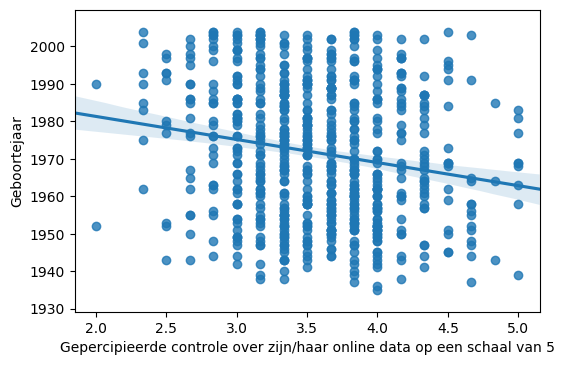

In [28]:
# Scatterplot between year of birth and variable control
fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.regplot(x=Data['control'], y=Data['Q6'], marker ='o')
ax.set(xlabel = 'Gepercipieerde controle over zijn/haar online data op een schaal van 5', ylabel = 'Geboortejaar')

In [29]:
# Spearman correlation between year of birth and variable control
spearmanr(Data['control'], Data['Q6'])

SpearmanrResult(correlation=-0.1801400536057082, pvalue=1.6970856552489997e-06)

[Text(0, 0.5, 'Geboortejaar'),
 Text(0.5, 0, 'Vertrouwen in organisaties (PCA factor)')]

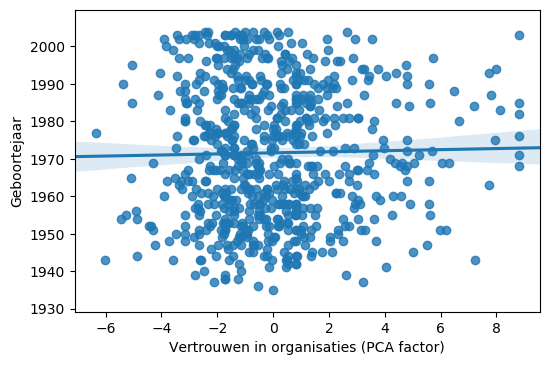

In [87]:
# Scatterplot between year of birth and PCA factor
fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.regplot(x=Data['PCA factor'], y=Data['Q6'], marker ='o')
ax.set(xlabel = 'Vertrouwen in organisaties (PCA factor)', ylabel = 'Geboortejaar')

In [31]:
# Spearman correlation between year of birth and PCA factor
spearmanr(Data['PCA factor'], Data['Q6'])

SpearmanrResult(correlation=0.002769382907583927, pvalue=0.941819871424961)

In [60]:
# Variance inflation factor (VIF)
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF_Value"] = [variance_inflation_factor(dataset.values, i) for i in range (dataset.shape[1])]
    return(vif)
features = Data[['PCA factor', 'Q6']]
calculate_vif(features)

,features,VIF_Value
0,PCA factor,1.0
1,Q6,1.0


In [82]:
# Multiple linear regression
## Set variables
X = Data[['PCA factor', 'Q6']] # here we have 2 variables for multiple regression.
y = Data['control']

## Create regression with sklearn
regr = LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

## with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 14.81932437423803
Coefficients: 
 [ 0.07006412 -0.00570163]
                            OLS Regression Results                            
Dep. Variable:                control   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     57.23
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           9.87e-24
Time:                        15:47:29   Log-Likelihood:                -501.27
No. Observations:                 697   AIC:                             1009.
Df Residuals:                     694   BIC:                             1022.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [137]:
# Check correlations
## Spearman correlation for digital skills
Data_skills = Data[['Q97_1', 'Q97_2', 'Q97_3', 'Q97_4', 'Q97_6']]
Data_skills.corr(method="spearman")

,Q97_1,Q97_2,Q97_3,Q97_4,Q97_6
Q97_1,1.000000,-0.476250,-0.468463,-0.525891,-0.482341
Q97_2,-0.476250,1.000000,0.617515,0.636698,0.558320
Q97_3,-0.468463,0.617515,1.000000,0.672573,0.512703
Q97_4,-0.525891,0.636698,0.672573,1.000000,0.571551
Q97_6,-0.482341,0.558320,0.512703,0.571551,1.000000


In [140]:
# Variance inflation factor (VIF) for digital skills
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF_Value"] = [variance_inflation_factor(dataset.values, i) for i in range (dataset.shape[1])]
    return(vif)
features = Data[['Q97_2', 'Q97_3', 'Q97_4', 'Q97_6']]
calculate_vif(features)

,features,VIF_Value
0,Q97_2,16.745683
1,Q97_3,14.296333
2,Q97_4,15.088660
3,Q97_6,10.301888


In [144]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Separate data as response and feature variables
X = Data[['Q97_2', 'Q97_3', 'Q97_4', 'Q97_6']]
y = Data['Q97_1'] # The response variable for variable control
# Outer cross-validation configuration (5 folds)
cv_outer = KFold(n_splits=5, shuffle=True, random_state=7)
# Inner cross-validation configuration (3 folds)
cv_inner = KFold(n_splits=3, shuffle=True, random_state=7)
# Define models
models = []
models.append(('OLS', LinearRegression()))
# Create table for mean explained variance of models
Variables = ['Model', 'PCA factor(s)', 'Q97_1 (mean exp. var.)']
Model_results = pd.DataFrame(columns = Variables) 

In [145]:
# (Nested) cross-validation
for name, model in models:
    for components in range(2):
        # enumerate splits
        outer_results = list()
        for train_ix, test_ix in cv_outer.split(X):
            # split data
            X_train, X_test = X.loc[train_ix, :], X.loc[test_ix, :]
            y_train, y_test = y.loc[train_ix], y.loc[test_ix]

            # Pipeline for standardizing, principal component analysis (PCA), and models
            pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('pca', PCA(n_components=components+1)),
                    ('model', model)
                    ])
            param_grid = {}
            search = GridSearchCV(pipeline, param_grid, cv=cv_inner, scoring='explained_variance')
            result = search.fit(X_train, y_train)

            # get the best performing model fit on the whole training set
            best_model = result.best_estimator_
            # evaluate model on the hold out dataset
            StandardScaler(X_test)
            yhat = best_model.predict(X_test)
            # evaluate the model
            exp_var = explained_variance_score(y_test, yhat)
            # store the result
            outer_results.append(exp_var)
            # report progress
            print("Model: %s, PCA factor(s): %s" % (name, components+1))
            print('Explained variance=%.3f, Best estimator mean score=%.3f, Best estimator parameters=%s' % (exp_var, result.best_score_, result.best_params_))
            print()
        
        # Mean explained variance
        mean_exp_var = statistics.mean(outer_results)
        # Fill in table with mean explained variance of model for the learning rate
        Model_results = Model_results.append({'Model': name, "PCA factor(s)": components+1, 
                                              "Q97_1 (mean exp. var.)": mean_exp_var}, 
                                             ignore_index=True)
        # Print results of model
        print("Model: %s, PCA factor(s): %s" % (name, components+1))
        print(outer_results)
        print("Mean explained variance: %s" % (mean_exp_var))
        print()

Model: OLS, PCA factor(s): 1
Explained variance=0.279, Best estimator mean score=0.323, Best estimator parameters={}

Model: OLS, PCA factor(s): 1
Explained variance=0.323, Best estimator mean score=0.302, Best estimator parameters={}

Model: OLS, PCA factor(s): 1
Explained variance=0.365, Best estimator mean score=0.295, Best estimator parameters={}

Model: OLS, PCA factor(s): 1
Explained variance=0.214, Best estimator mean score=0.324, Best estimator parameters={}

Model: OLS, PCA factor(s): 1
Explained variance=0.342, Best estimator mean score=0.290, Best estimator parameters={}

Model: OLS, PCA factor(s): 1
[0.27875579549372687, 0.3230686754759151, 0.36458440546412063, 0.21350826712840665, 0.34239160689070924]
Mean explained variance: 0.3044617500905757

Model: OLS, PCA factor(s): 2
Explained variance=0.280, Best estimator mean score=0.316, Best estimator parameters={}

Model: OLS, PCA factor(s): 2
Explained variance=0.315, Best estimator mean score=0.302, Best estimator parameters

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


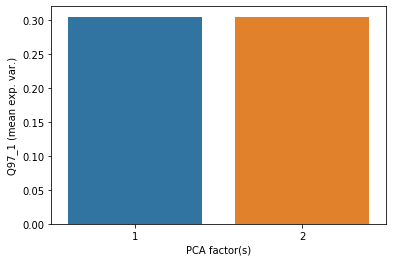

In [146]:
# Create plot for mean explained variance of the models (1 or 2 PCA factor(s))
sns.barplot(data=Model_results, x="PCA factor(s)", y="Q97_1 (mean exp. var.)")